**import libraies**

In [16]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

**LOAD DATASET**

In [17]:
df = pd.read_csv("/content/data.csv")

In [18]:
# Drop unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [19]:
# Encode target labels ('M' = 1, 'B' = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [20]:
# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

**splitting of data**

In [21]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize and train logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [23]:
# Make predictions
y_pred = model.predict(X_test)

In [24]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



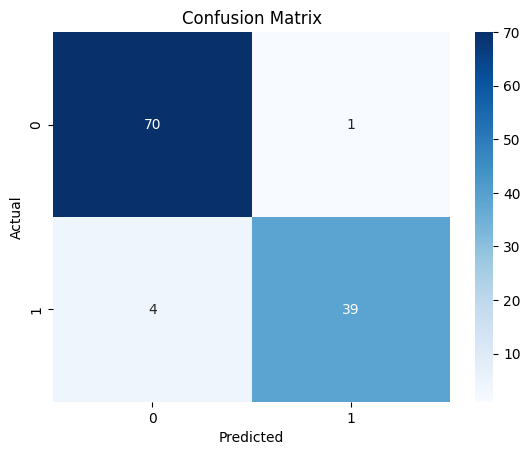

In [25]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
# Predictions and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [29]:
# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", acc)



Accuracy: 0.956140350877193


In [30]:

print("Precision:", prec)


Precision: 0.975


In [31]:


print("Recall:", rec)



Recall: 0.9069767441860465


In [32]:


print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.9977071732721914


In [33]:

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



**ROC CURVE**

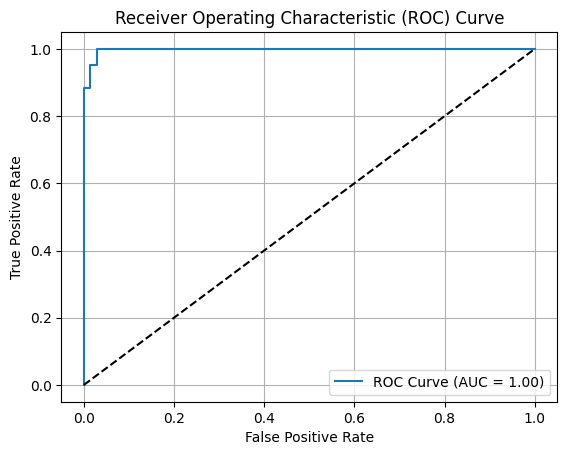

In [34]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Sigmoid Function**

🔹 What is the Sigmoid Function?
The sigmoid function maps any real-valued number to a value between 0 and 1. It is commonly used in logistic regression to convert linear outputs into probabilities.

🔹 Why Tune the Threshold?
By default, logistic regression uses a threshold of 0.5. But in imbalanced datasets or when costs of false positives vs false negatives differ, tuning the threshold helps:

Increase recall (sensitivity) if missing positives is dangerous (e.g., cancer detection)

Increase precision when false alarms are costly

In [35]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Generate precision-recall pairs for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)




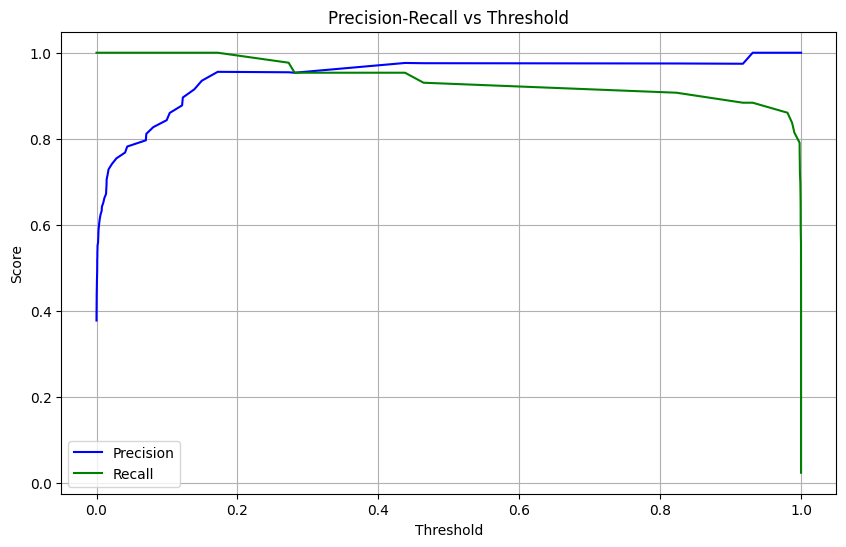

In [36]:


# Plot precision and recall as a function of threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", color='blue')
plt.plot(thresholds, recalls[:-1], label="Recall", color='green')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
# Custom threshold
custom_threshold = 0.3
y_pred_custom = (y_prob >= custom_threshold).astype(int)

# Re-evaluate with custom threshold
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix (Threshold=0.3):")
print(confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report (Threshold=0.3):")
print(classification_report(y_test, y_pred_custom))


Confusion Matrix (Threshold=0.3):
[[70  1]
 [ 2 41]]

Classification Report (Threshold=0.3):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

